In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("wine_data_fixed.csv")

In [4]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64
Series([], dtype: int64)


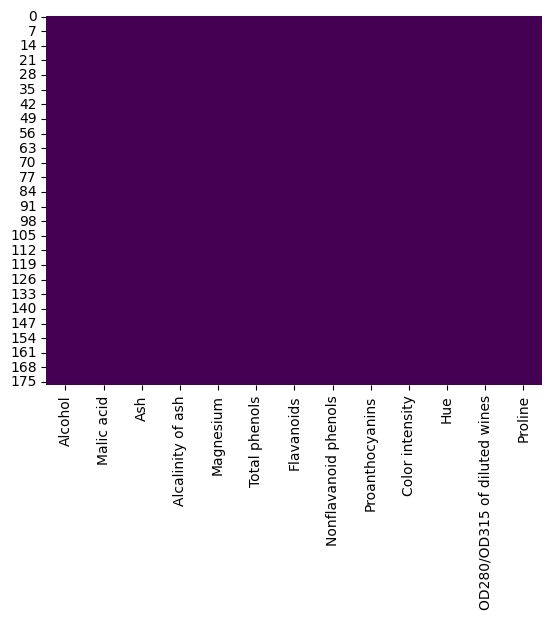

In [13]:
import seaborn as sns
# Check for NaN values in the data:
missing_values = df.isna().sum()
print(missing_values)
print(missing_values[missing_values > 0])
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

          Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  177.000000  177.000000  177.000000         177.000000  177.000000   
mean    12.993672    2.339887    2.366158          19.516949   99.587571   
std      0.808808    1.119314    0.275080           3.336071   14.174018   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.360000    1.600000    2.210000          17.200000   88.000000   
50%     13.050000    1.870000    2.360000          19.500000   98.000000   
75%     13.670000    3.100000    2.560000          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     177.000000  177.000000            177.000000       177.000000   
mean        2.292260    2.023446              0.362316         1.586949   
std         0.626465    0.998658              0.124653         0.571545   
min         0.9

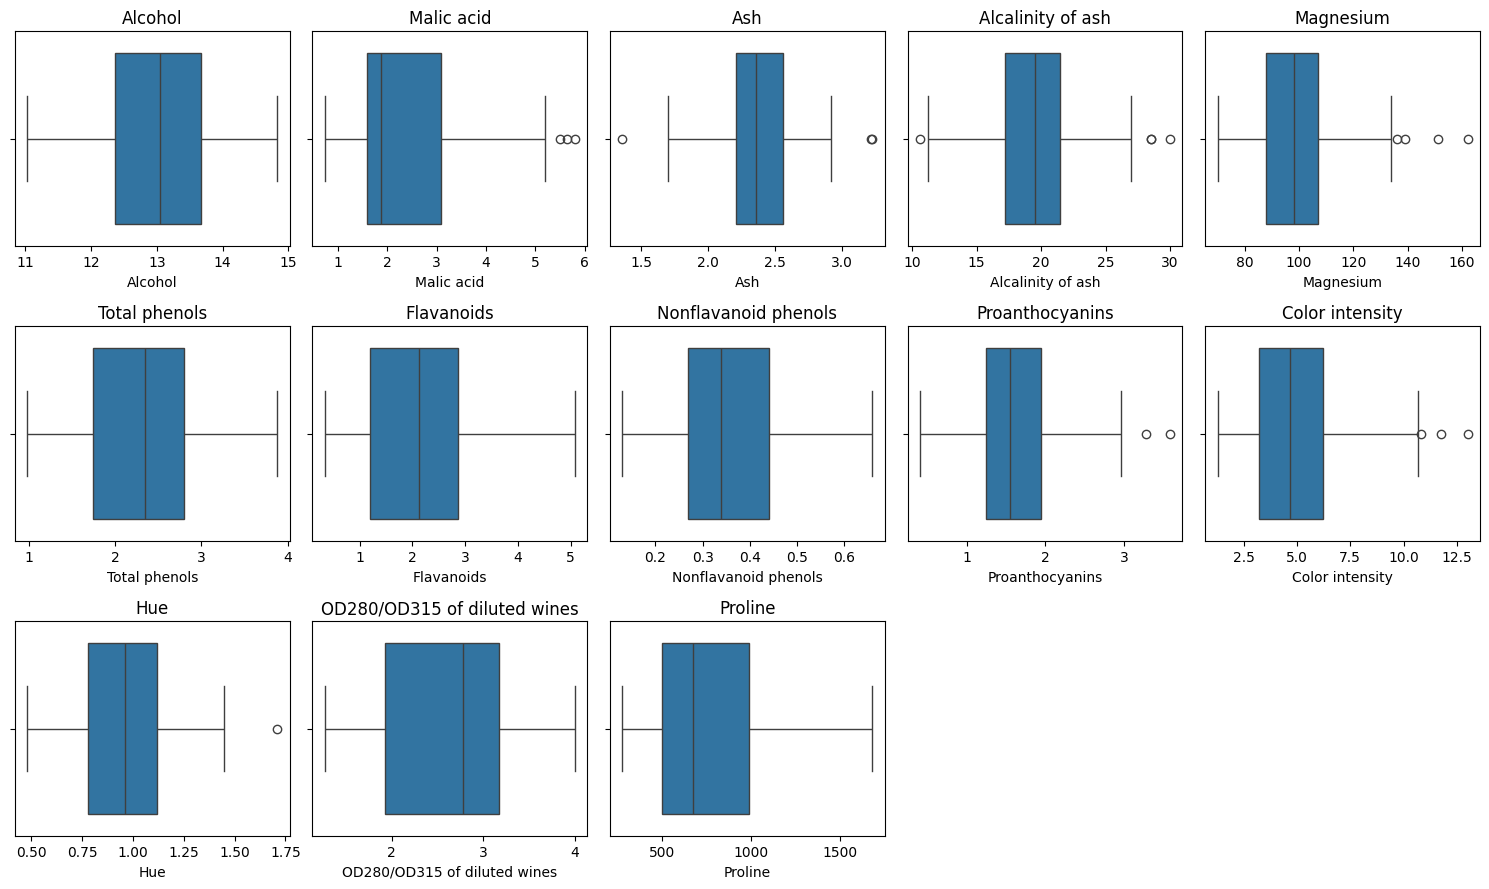

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get summary statistics
print(df.describe())

# Check data types
print(df.dtypes)

# Set up the grid layout: 5 plots per row
num_cols = len(df.columns)  # Total number of columns
plots_per_row = 5           # Number of plots per row
rows = (num_cols // plots_per_row) + (num_cols % plots_per_row > 0)  # Calculate number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(15, 3 * rows))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the array of axes

# Plot each boxplot on the grid
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])  # Use specific axis for each plot
    axes[i].set_title(col)              # Set title for each boxplot

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



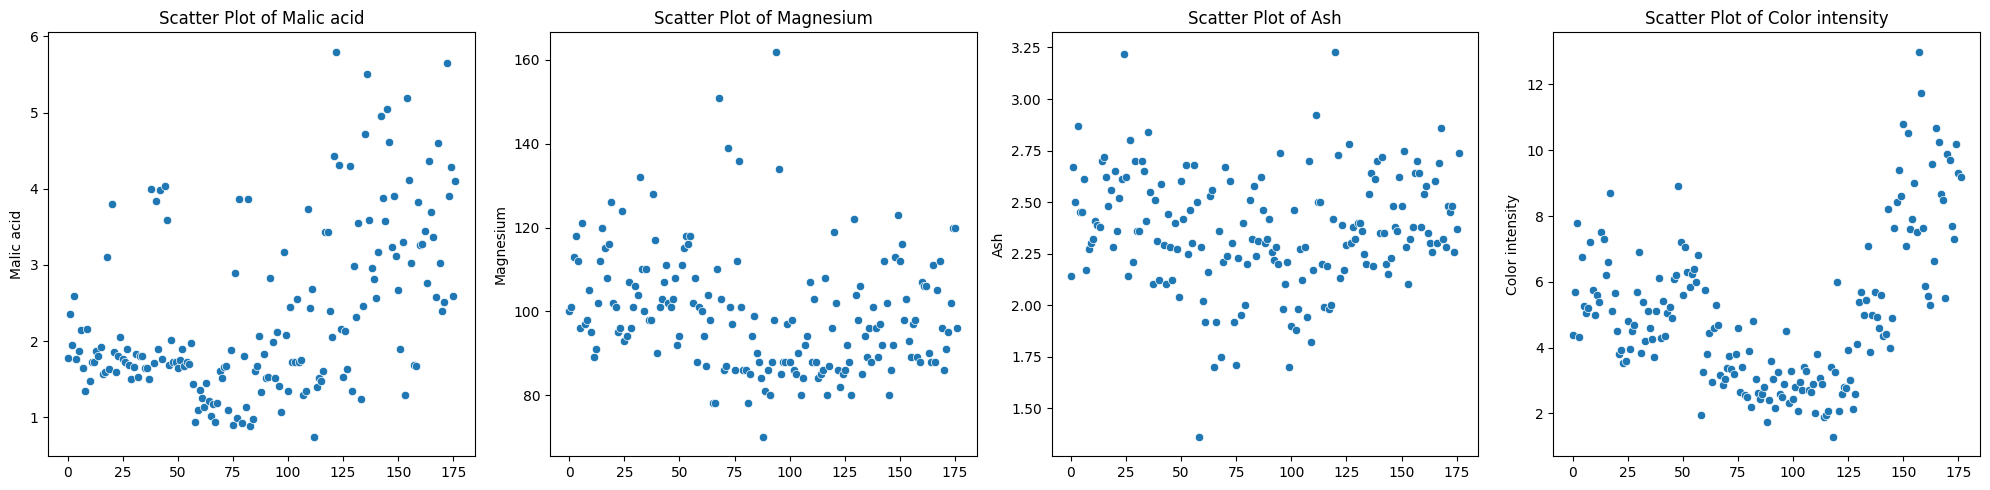

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns with outliers to investigate
columns_to_plot = ['Malic acid', 'Magnesium', 'Ash', 'Color intensity']  # Replace with your relevant columns

# Create a figure with subplots - 1 row, 4 columns
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5))  # Adjust figsize as needed

# Plot each attribute in its respective subplot
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(data=df, x=range(len(df)), y=col, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {col}')

plt.tight_layout()  # Adjust the spacing between plots
plt.show()


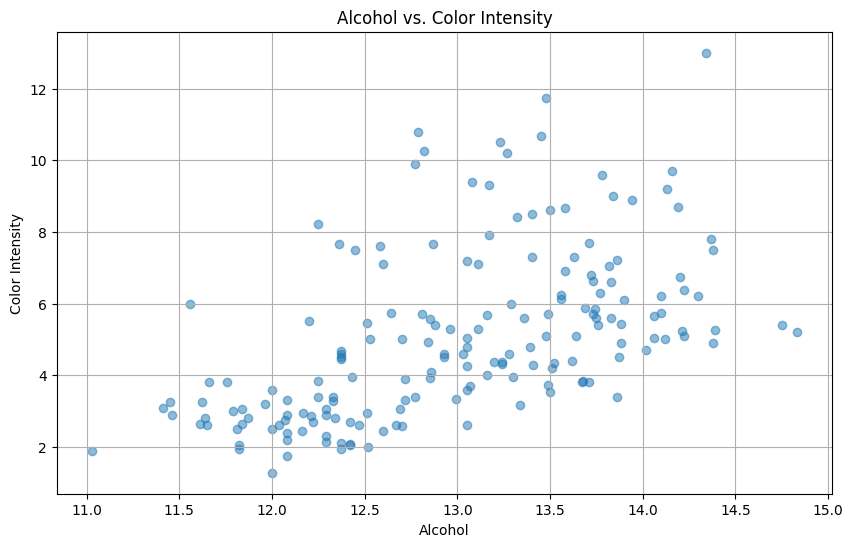

In [6]:
# Test plot:

alcohol = df['Alcohol']
color_intensity = df['Color intensity']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(alcohol, color_intensity, alpha=0.5)
plt.title('Alcohol vs. Color Intensity')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.grid(True)
plt.show()

## Exploratory plot to see some general correlations that are occuring in the data.

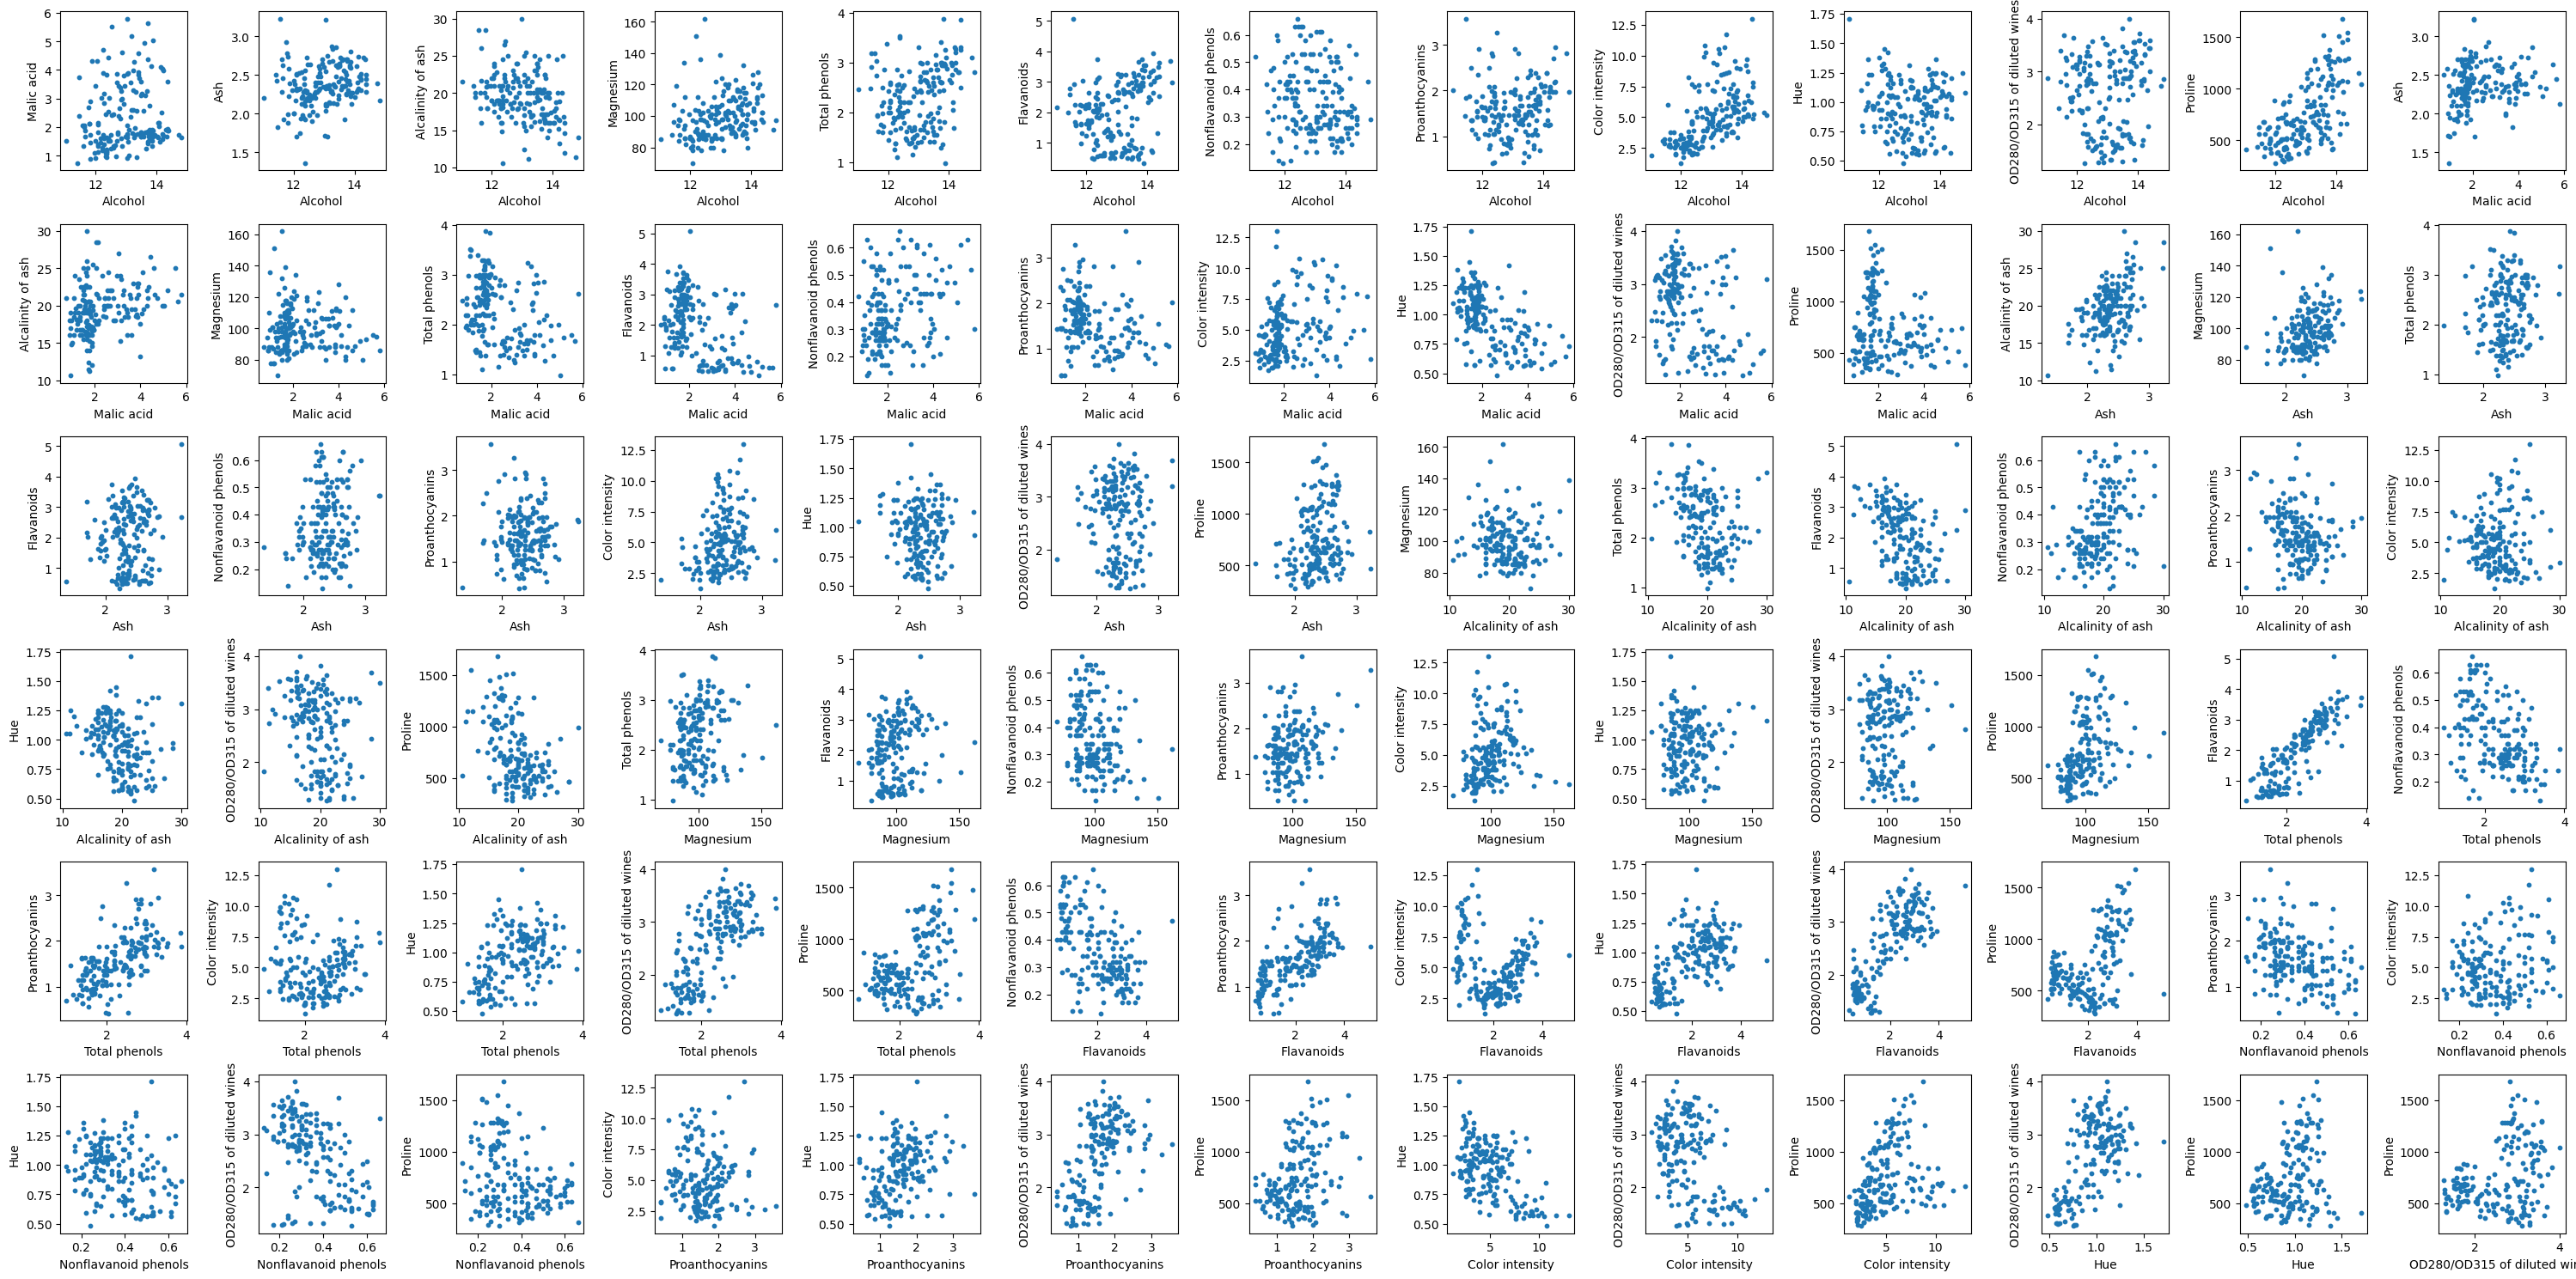

In [7]:
import itertools
all_col_combos = list(itertools.combinations(df, 2))


# Plot the 91 plots, in a scatter plot
fig, axs = plt.subplots(nrows=6, ncols=13, figsize=(30,15))
#fig.suptitle('')

for i, col_combo in enumerate(all_col_combos):
    row = i // 13
    col = i % 13

    axs[row, col].scatter(df[col_combo[0]], df[col_combo[1]], s=10)
 
    axs[row, col].set_xlabel(col_combo[0])
    axs[row, col].set_ylabel(col_combo[1])
   

plt.tight_layout()
plt.show()

2.1.1
['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


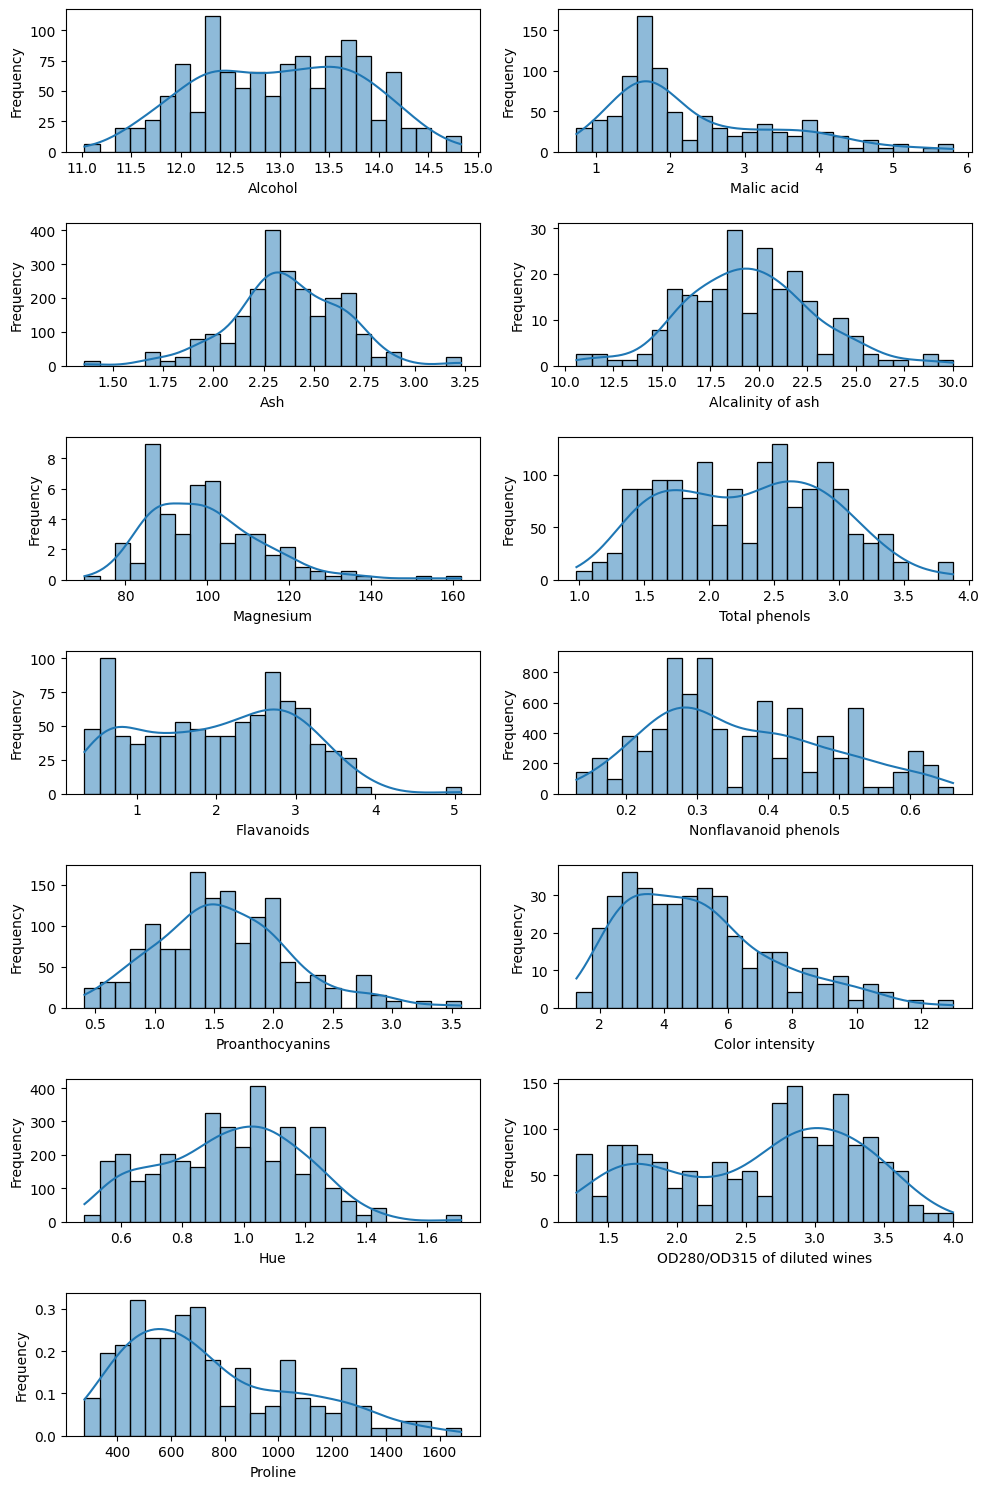

In [10]:
import seaborn as sns
import numpy as np
print(np.__version__)


# List of headings:
headings = []
for col in df.columns:
    headings.append(col)

print(headings)

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10,15))


for i, heading in enumerate(headings):
    row = i // 2
    col = i % 2
    
    sns.histplot(df[heading], kde=True, bins=25, ax=axs[row, col], stat="frequency") #Currently set to freq
    plt.xlabel(heading)

fig.delaxes(axs[6,1]) #Delete the odd empty plot
plt.tight_layout()
plt.subplots_adjust(hspace=0.5) # adjust vertical space between plots


## Correlation Matrix to better visualise variable correlations!

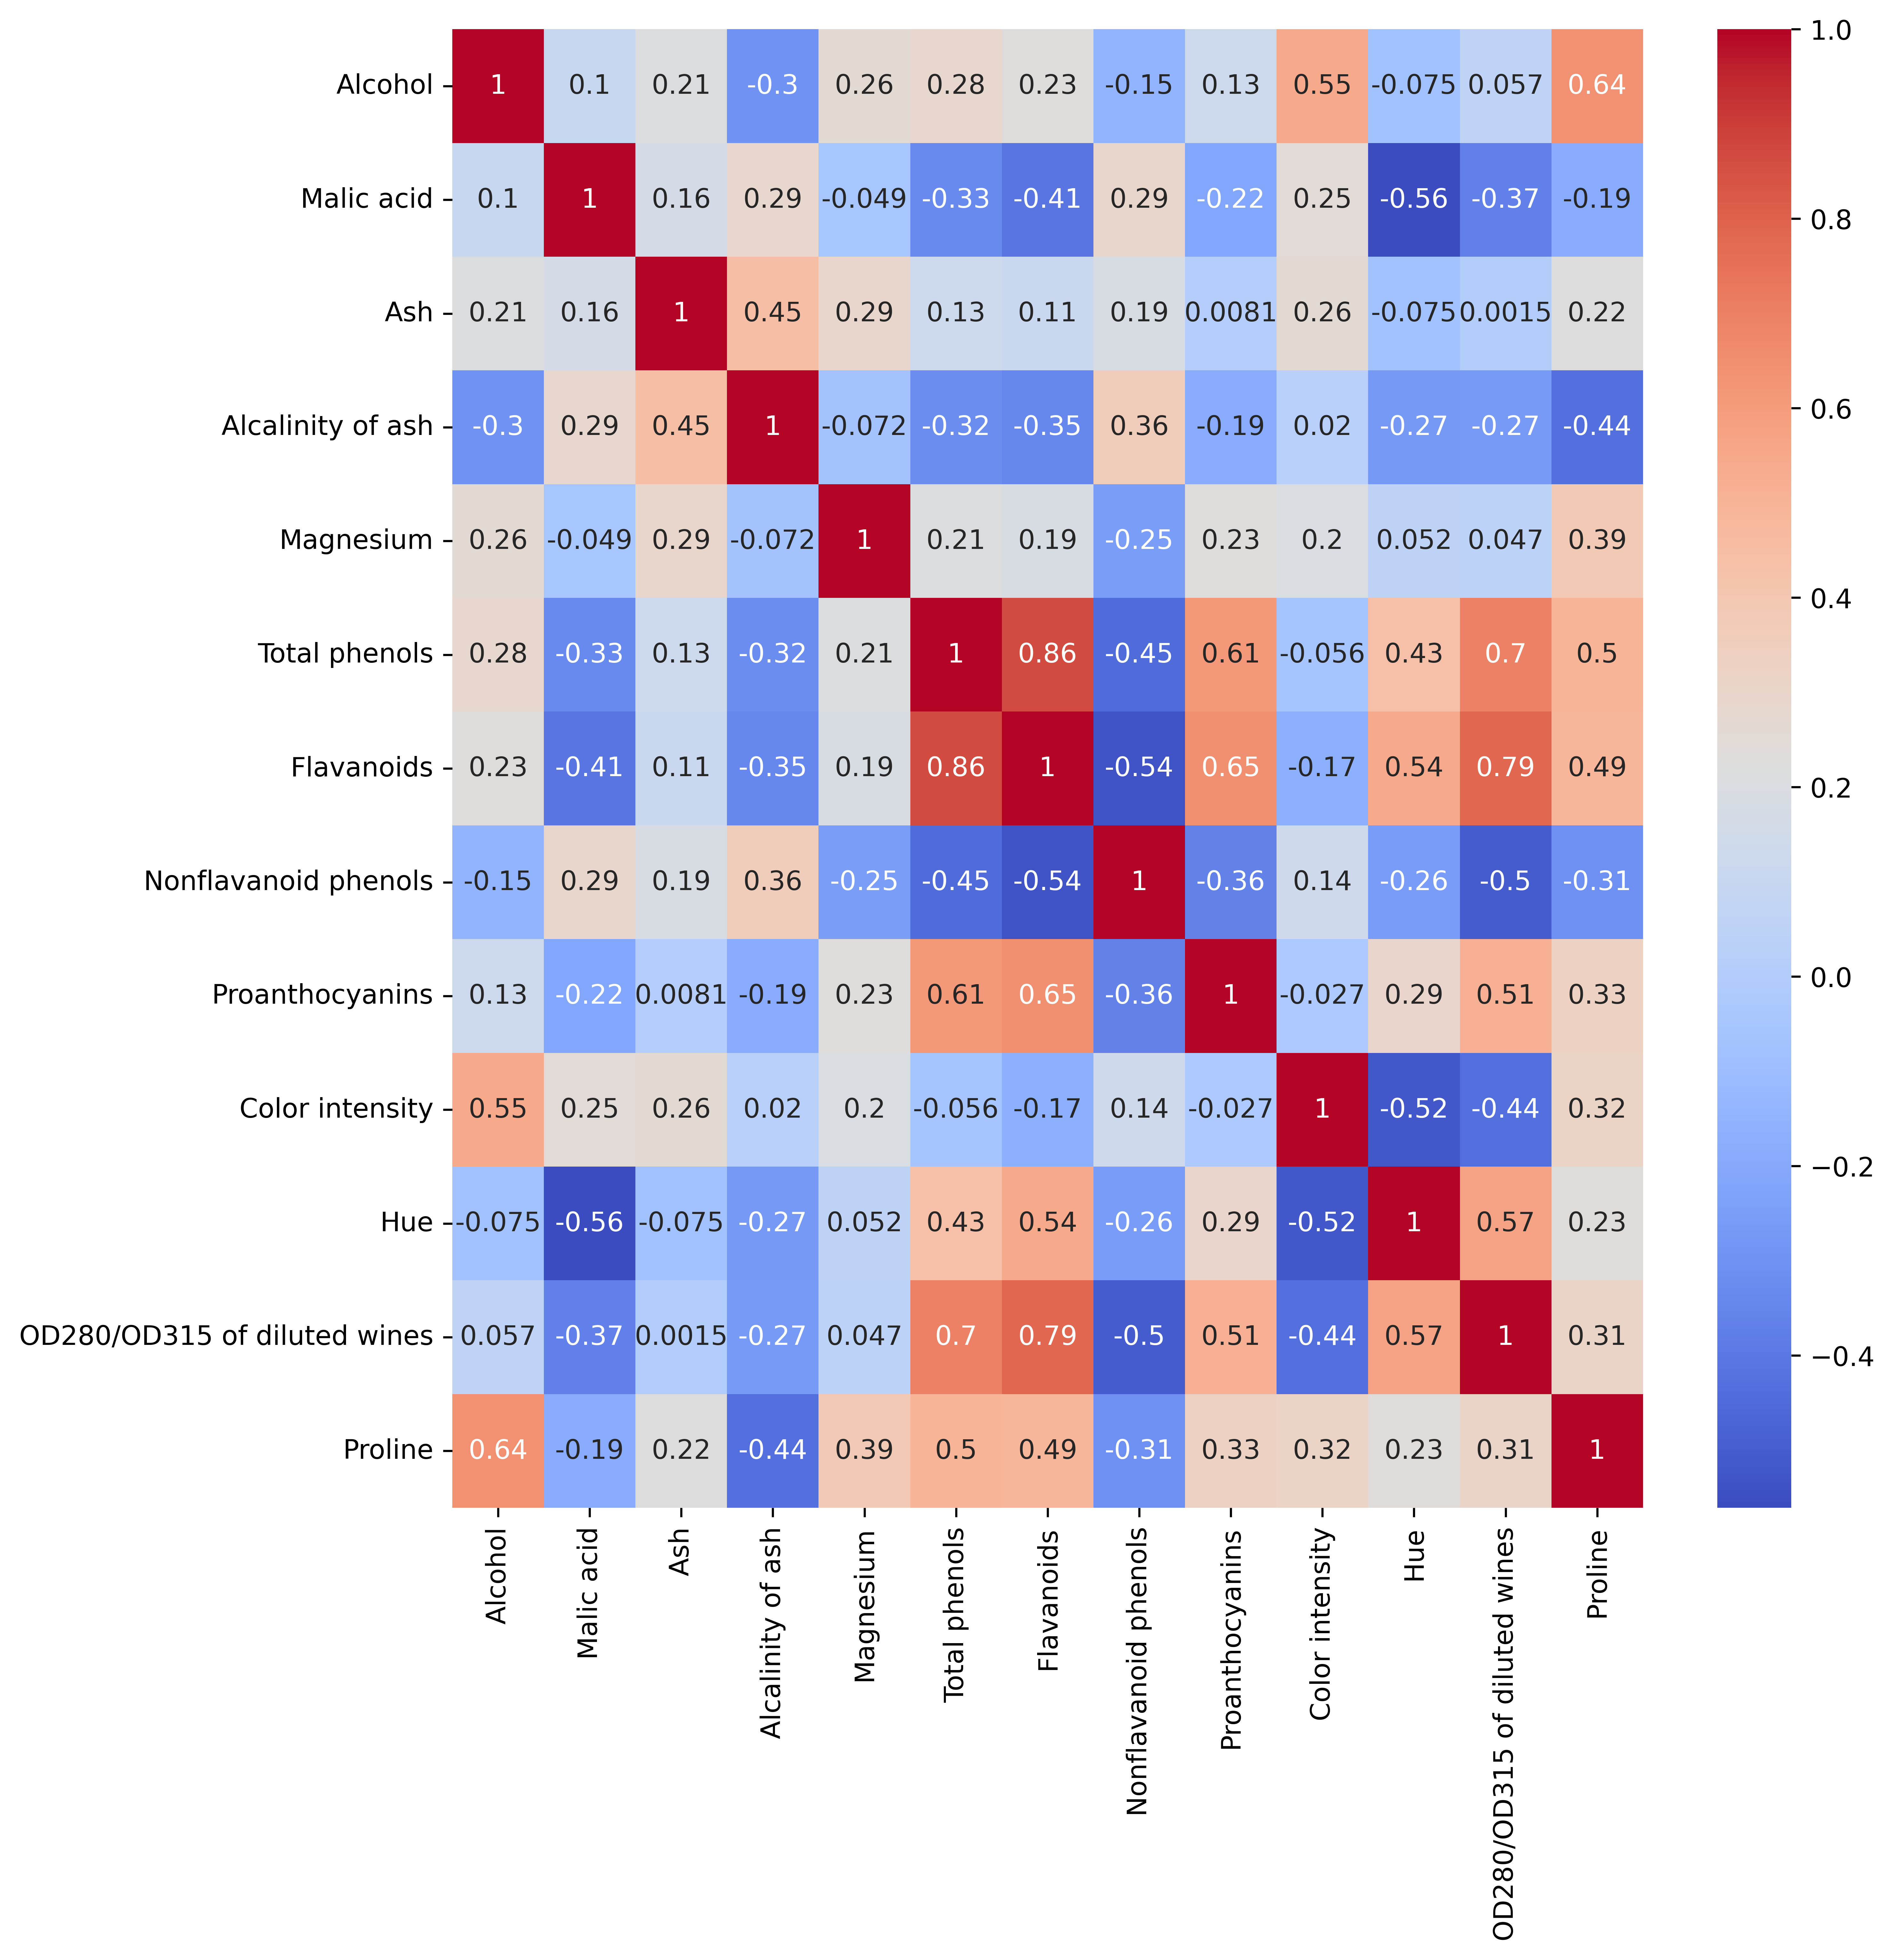

In [9]:
# Create a correlation matrix from our data.
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10,10), dpi=600)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()